<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0624/blob/main/6_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [15]:
# (50000, 1): 因為有可能不是只有一個答案 -> (50000)
y_train = y_train.reshape(50000)
y_test = y_test.reshape(10000)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [16]:
labels = [
  "airplane",
  "automobile",
  "bird",
  "cat",
  "deer",
  "dog",
  "frog",
  "horse",
  "ship",
  "truck",
]

automobile


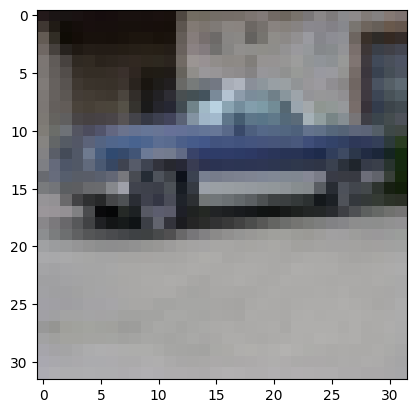

In [17]:
import matplotlib.pyplot as plt
idx = 10000
print(labels[y_train[idx]])
plt.imshow(x_train[idx])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 256)        

In [19]:
# 改良版(剔除位置資訊)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten

layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 256)        

In [20]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [21]:

from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print(y_train[0])
print(y_train_onehot[0])

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [22]:
# 其實係數不是完全隨機, 他是在某個範圍作隨機
# 其實變相要求你的輸入應該要落在某個範圍, tensorflow希望你的輸入落在0~1或者-1~1
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [23]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]

model.fit(x_train_scaled,
     y_train_onehot,
     batch_size=100,
     epochs=200,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/200
450/450 - 6s - loss: 1.9289 - accuracy: 0.2932 - val_loss: 1.6668 - val_accuracy: 0.3700 - 6s/epoch - 14ms/step
Epoch 2/200
450/450 - 3s - loss: 1.5651 - accuracy: 0.4354 - val_loss: 1.6331 - val_accuracy: 0.4286 - 3s/epoch - 7ms/step
Epoch 3/200
450/450 - 4s - loss: 1.3952 - accuracy: 0.5003 - val_loss: 1.3219 - val_accuracy: 0.5194 - 4s/epoch - 8ms/step
Epoch 4/200
450/450 - 3s - loss: 1.2774 - accuracy: 0.5446 - val_loss: 1.1739 - val_accuracy: 0.5866 - 3s/epoch - 8ms/step
Epoch 5/200
450/450 - 4s - loss: 1.1835 - accuracy: 0.5776 - val_loss: 1.0994 - val_accuracy: 0.6106 - 4s/epoch - 8ms/step
Epoch 6/200
450/450 - 4s - loss: 1.1033 - accuracy: 0.6091 - val_loss: 1.0793 - val_accuracy: 0.6218 - 4s/epoch - 8ms/step
Epoch 7/200
450/450 - 4s - loss: 1.0338 - accuracy: 0.6326 - val_loss: 0.9837 - val_accuracy: 0.6532 - 4s/epoch - 8ms/step
Epoch 8/200
450/450 - 3s - loss: 0.9733 - accuracy: 0.6584 - val_loss: 0.9324 - val_accuracy: 0.6782 - 3s/epoch - 7ms/step
Epoch 9/200
450

In [24]:
model.evaluate(x_test_scaled, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.7685


[0.685489296913147, 0.7684999704360962]

網址:https://5b0988e595225.cdn.sohucs.com/q_70,c_zoom,w_640/images/20200131/9e239798b7db47d49fe9f92495e4f751.jpeg


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host '5b0988e595225.cdn.sohucs.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


1/1 [==============================] - 0s 26ms/step
airplane 的機率: 0.0024
automobile 的機率: 0.0002
bird 的機率: 1e-04
cat 的機率: 0.5991
deer 的機率: 0.0243
dog 的機率: 0.2198
frog 的機率: 1e-04
horse 的機率: 0.1525
ship 的機率: 0.0004
truck 的機率: 0.0011


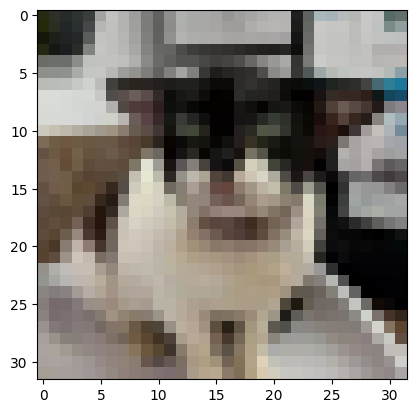

In [35]:
# PIL: pillow
import requests
from PIL import Image
url = input("網址:")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=h, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
# 當初怎麼進去, 現在就要怎麼進去, 所以 (32, 32, 3) 和 (1, 32, 32, 3) 是不一樣的
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
prob = model.predict(img_np)[0]
for t, p in zip(labels, prob):
    print(t, "的機率:", round(p, 4))
plt.imshow(img)

In [31]:
pre = model.predict(x_test_scaled).argmax(axis=1)
pre

313/313 [==============================] - 1s 2ms/step


array([3, 8, 8, ..., 5, 1, 7])

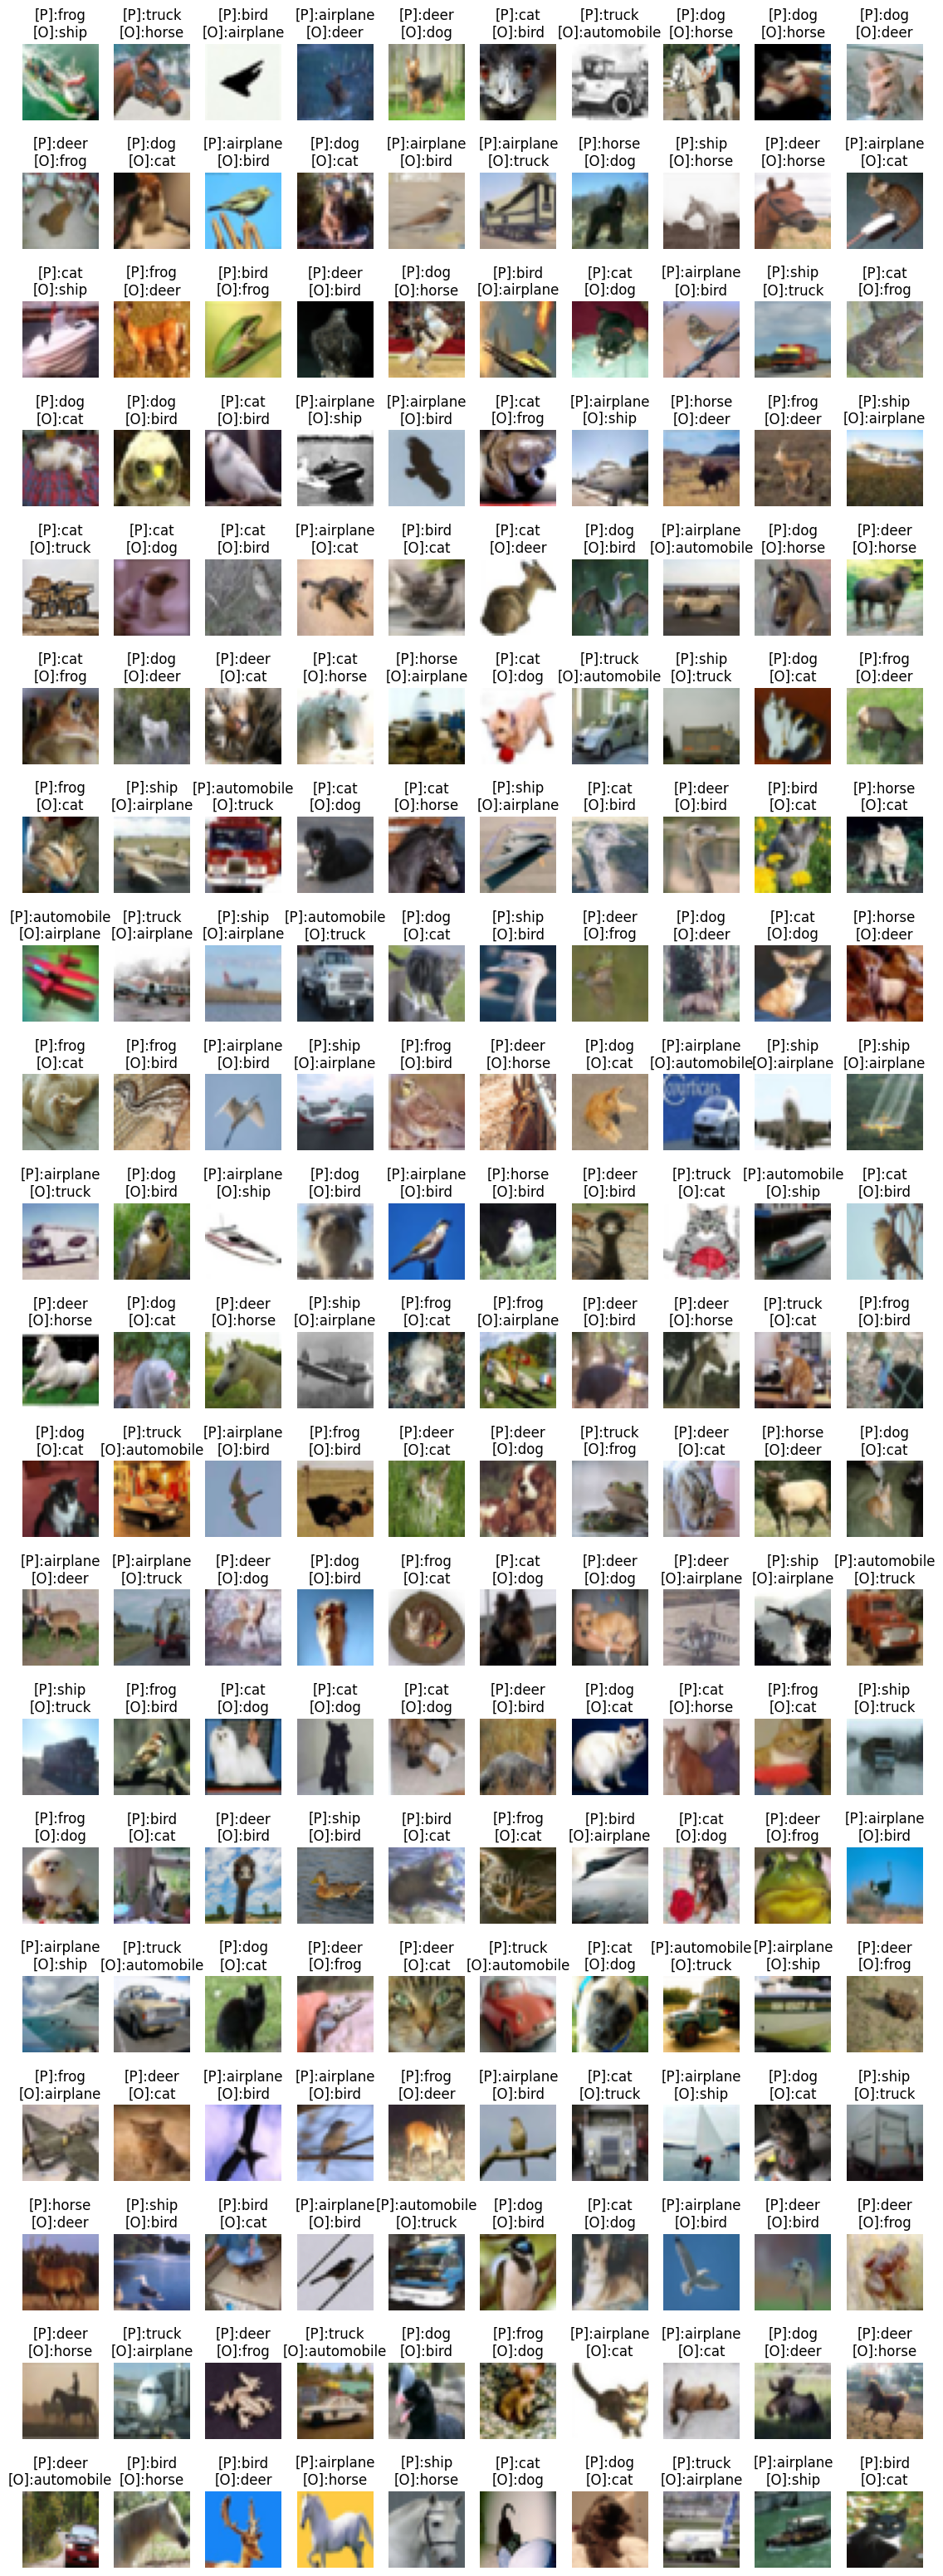

In [33]:
import numpy as np
# 預測不對的idx
# 太多了, 所以我取兩百筆就好
idx = np.nonzero(pre != y_test)[0][:200]
# 預測不對的圖的正確答案
pre_false_label = y_test[idx]
# 預測不對的圖的預測值
pre_false_pred = pre[idx]
# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(labels[pre_false_pred[i]], labels[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])